In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
lic = pd.read_csv('https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/licenses_fall2022.csv')
lic.head()

,_id,License Type,Description,License Number,License Status,Business,Title,First Name,Middle,Last Name,...,Specialty/Qualifier,Controlled Substance Schedule,Delegated Controlled Substance Schedule,Ever Disciplined,LastModifiedDate,Case Number,Action,Discipline Start Date,Discipline End Date,Discipline Reason
0,1189509,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129446286,NOT RENEWED,N,NaN,EILEEN,NaN,SANTACRUZ,...,None,None,None,N,03/18/2022,None,None,None,None,None
1,801037,DETECTIVE BOARD,FIREARM CONTROL CARD,229030294.0,NOT RENEWED,N,NaN,DAGMAR,J,NORDLUND,...,None,None,None,N,08/16/2006,None,None,None,None,None
2,365129,COSMO,LICENSED COSMETOLOGIST,11053076.0,NOT RENEWED,N,NaN,RADOJE,NaN,ZELENOVIC,...,None,None,None,N,05/26/2006,None,None,None,None,None
3,595427,COSMO,LICENSED COSMETOLOGIST,11295645.0,ACTIVE,N,NaN,BECKY SUE,L,BURROUGHS,...,None,None,None,N,11/12/2021,None,None,None,None,None
4,653668,COSMO,LICENSED NAIL TECHNICIAN,169006247,NOT RENEWED,N,NaN,BILL G,L,LETNER,...,None,None,None,N,05/30/2006,None,None,None,None,None


In [4]:
lic.columns

Index(['_id', 'License Type', 'Description', 'License Number',
       'License Status', 'Business', 'Title', 'First Name', 'Middle',
       'Last Name', 'Prefix', 'Suffix', 'Business Name', 'BusinessDBA',
       'Original Issue Date', 'Effective Date', 'Expiration Date', 'City',
       'State', 'Zip', 'County', 'Specialty/Qualifier',
       'Controlled Substance Schedule',
       'Delegated Controlled Substance Schedule', 'Ever Disciplined',
       'LastModifiedDate', 'Case Number', 'Action', 'Discipline Start Date',
       'Discipline End Date', 'Discipline Reason'],
      dtype='object')

In [5]:
lic['Original Issue Date']

0       02/03/2020
1       02/07/1995
2       02/28/1945
3       11/22/2011
4       07/12/1995
           ...    
9995    08/04/1987
9996    05/22/1989
9997    05/09/1966
9998    10/04/1983
9999    10/16/2008
Name: Original Issue Date, Length: 10000, dtype: object

Switching date order to make it easier to just choose year

In [6]:
lic['Original Issue Date'] = pd.to_datetime(lic['Original Issue Date'],
                                            format='%m/%d/%Y',
                                            errors='coerce')

In [7]:
lic['Original Issue Date']

0      2020-02-03
1      1995-02-07
2      1945-02-28
3      2011-11-22
4      1995-07-12
          ...    
9995   1987-08-04
9996   1989-05-22
9997   1966-05-09
9998   1983-10-04
9999   2008-10-16
Name: Original Issue Date, Length: 10000, dtype: datetime64[ns]

In [8]:
#creating a new column for just year
lic['Original Issue Year'] = lic['Original Issue Date'].dt.year

In [9]:
lic['Original Issue Year']

0       2020.0
1       1995.0
2       1945.0
3       2011.0
4       1995.0
         ...  
9995    1987.0
9996    1989.0
9997    1966.0
9998    1983.0
9999    2008.0
Name: Original Issue Year, Length: 10000, dtype: float64

In [10]:
lic['Effective Date']

0       02/03/2020
1       02/07/1995
2       02/28/1945
3       11/12/2021
4       07/12/1995
           ...    
9995    08/04/1987
9996    05/22/1989
9997    05/09/1966
9998    12/17/2021
9999    10/25/2021
Name: Effective Date, Length: 10000, dtype: object

In [11]:
lic['Effective Date'] = pd.to_datetime(lic['Effective Date'],
                                            format='%m/%d/%Y',
                                            errors='coerce')

In [12]:
lic['Effective Date']

0      2020-02-03
1      1995-02-07
2      1945-02-28
3      2021-11-12
4      1995-07-12
          ...    
9995   1987-08-04
9996   1989-05-22
9997   1966-05-09
9998   2021-12-17
9999   2021-10-25
Name: Effective Date, Length: 10000, dtype: datetime64[ns]

In [13]:
lic['Effective Year'] = lic['Effective Date'].dt.year

In [14]:
#did same thing for effective year as original issue year
lic['Effective Year']

0       2020.0
1       1995.0
2       1945.0
3       2021.0
4       1995.0
         ...  
9995    1987.0
9996    1989.0
9997    1966.0
9998    2021.0
9999    2021.0
Name: Effective Year, Length: 10000, dtype: float64

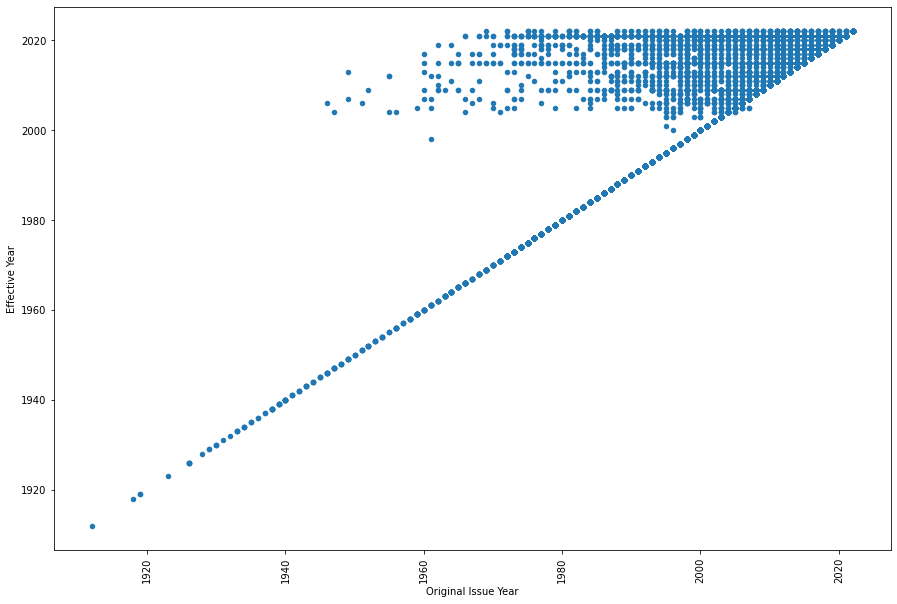

In [27]:
#1
lic.plot(x='Original Issue Year', y='Effective Year', figsize=(15,10),rot=90, kind = 'scatter')
plt.show()

For question 1, I chose to use a scatter plot to show the relationship between the Original Issue Year and the Effective Year, as both columns of data include numerical values that can easily be visualized using a scatter plot. I tested out different types of plots, including a line graph, which was too bunched up and hard to find anything observable from the hecticness. I used the basic plot command, putting original issue year on the x-axis, and Effective Year on the y-axis. As seen in the visualization, the Original Issue year is positively correlated to Effective Year, however, there are many data points in which the Effective Year is far larger than the Original Issue Year. For calculations, all I had to do was aggregate the data and ensure only the year was used. 

In [96]:
median = lic.groupby('County')['Effective Year'].median()
median

County
ADAMS                  2017.0
ALABAMA                1993.0
ALEXANDER              1959.5
ARIZONA                1994.0
ARKANSAS               1999.0
                        ...  
WILLIAMSON             2011.0
WINNEBAGO              2010.0
WISCONSIN              1998.5
WOODFORD               2008.0
WYOMING                2015.0
Name: Effective Year, Length: 141, dtype: float64

In [98]:
median.reset_index(drop=True)
median.head()

County
ADAMS        2017.0
ALABAMA      1993.0
ALEXANDER    1959.5
ARIZONA      1994.0
ARKANSAS     1999.0
Name: Effective Year, dtype: float64

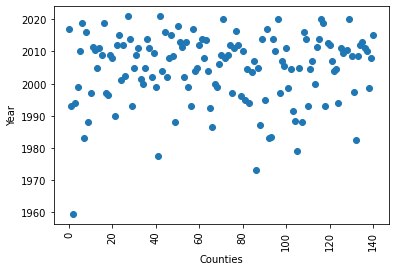

In [125]:
plt.scatter(range(len(df)), df['Effective Year'], marker='o')
plt.xlabel('Counties')
plt.ylabel('Year')

plt.xticks(rotation=90)
plt.show()

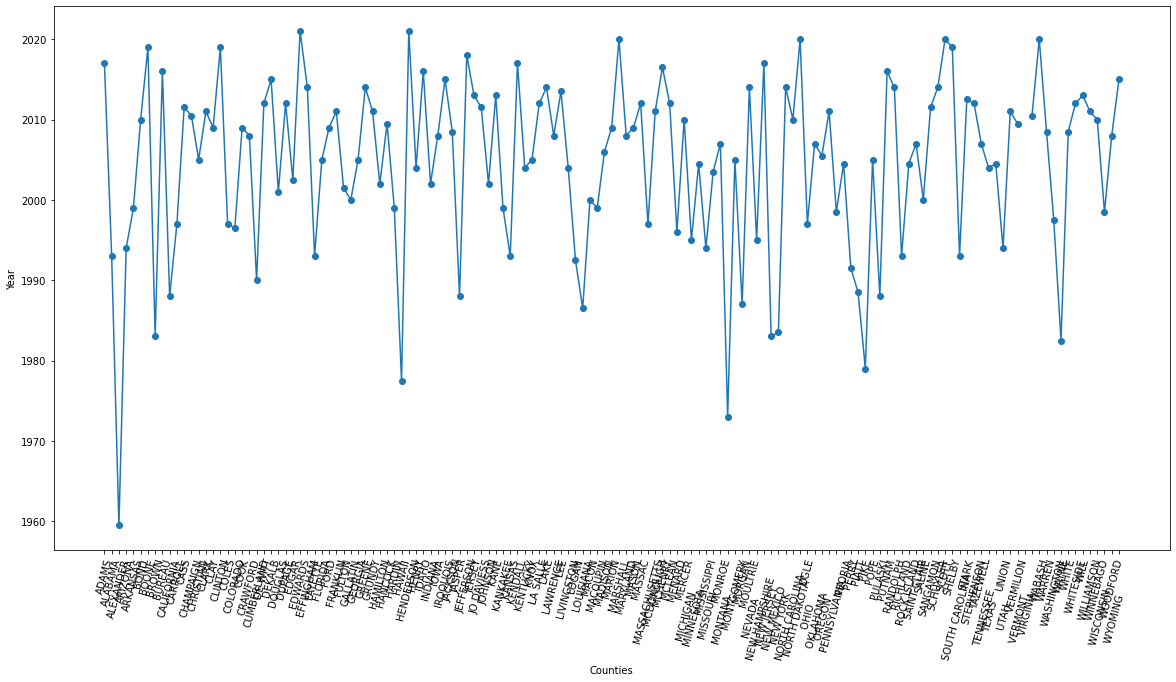

In [151]:
#2
#adding x label county names, and making the plot larger
df = pd.DataFrame(median)
plt.figure(figsize=(20,10))
plt.scatter(range(len(df)), df['Effective Year'], marker='o')
plt.plot(df['Effective Year'])
plt.xlabel('Counties')
plt.ylabel('Year')
plt.xticks(rotation=75)
    
plt.show()

The second prompt was a little difficult to work my way around, as I ran into a few issues when creating the new dataframe. When attempting to isolate the median Effective Year of the counties, I had trouble visualizing a scatter plot, because it wouldn't allow me to create a scatter plot since the data was technically not a DataFrame. In order to work around this, I used the reset index command, and was able to overlap the county name information on top of a scatter plot, as well as the line graph. In order to include the county names on the x-axis (if you look at the first plot it is in scatter format, but there is no labeled county names), I needed to inlcude a second plot that overlaps the scatter plot. I also increased the fig size, so the labels were more visible. The combination of line graph and scatter plot makes sense in the context of the problem, so you can compare each county and their Median effective year.

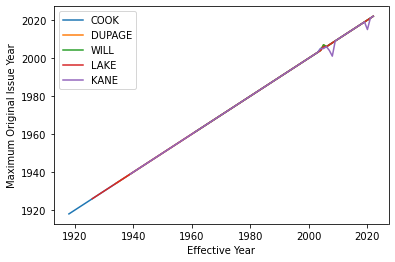

In [153]:
#4
counts = lic['County'].value_counts()
top_five = counts.head(5).index.tolist()

top_5_df = lic[lic['County'].isin(top_five)]

combined = top_5_df.groupby(['Effective Year', 'County'])
max_year = combined['Original Issue Year'].max()
max_year = max_year.reset_index()

for county in top_five:
    county_data = max_year[max_year['County'] == county]
    plt.plot(county_data['Effective Year'], county_data['Original Issue Year'], label=county)

plt.xlabel('Effective Year')
plt.ylabel('Maximum Original Issue Year')
plt.legend()
plt.show()

For prompt 4, I chose to use a line graph to visualize the Maximum Original Issue Year for the five most common counties as a function of Effective year. I had to calculate the max Effective Year for each of the top 5 counties. In order to find the top 5 counties, I used value_counts and it listed the top 5 for me, from there I created a new data frame that includes just those counties. Using a simple function to plot the counties, this is the graph that I came up with. I included a legend to make it easier to understand. 